### 1. 基于pytorch的线性回归

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 30
learning_rate = 0.1


In [3]:
# Toy dataset
x_train = np.array([0.1, 0.2, 0.3, 
              0.4, 0.5, 0.6, 
              0.7, 0.8, 0.9, 1], dtype=np.float32).reshape(-1,1)

y_train = np.array([0.05,0.08,0.1,
             0.09,0.13,0.14,
             0.17,0.21,0.28,0.27], dtype=np.float32).reshape(-1,1)

In [4]:
w = torch.ones([1,1],requires_grad=True)
b = torch.ones([1,1],requires_grad=True)

In [5]:
def model(x):
    return torch.matmul(x,w) + b

In [6]:
model(torch.tensor([1.0]))

tensor([[2.]], grad_fn=<AddBackward0>)

In [7]:
def mse(t1, t2):
    diff = t1 - t2
    return torch.mean(diff * diff) 

In [8]:
optimizer = torch.optim.SGD([w,b], lr=learning_rate)  

In [9]:
# 训练模型
for epoch in range(num_epochs):
    # 将numpy数据格式转换为tensor数据格式
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    #  将inputs放入model函数计算输出，这是前向过程
    outputs = model(inputs)
    loss = mse(outputs, targets)
    
    #  后向过程：最优化损失函数
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))


Epoch [10/30], Loss: 0.0093
Epoch [20/30], Loss: 0.0012
Epoch [30/30], Loss: 0.0010


In [10]:
print(w)
print(b)

tensor([[0.3389]], requires_grad=True)
tensor([[-0.0374]], requires_grad=True)


然后我们可以显示真实值和模型预测值之间的图

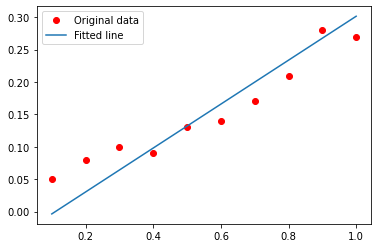

In [11]:

predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()


In [13]:
# 定义超参数
input_size = 1
output_size = 1
num_epochs = 30
learning_rate = 0.1
# 定义数据
x_train = np.array([0.1, 0.2, 0.3, 
              0.4, 0.5, 0.6, 
              0.7, 0.8, 0.9, 1], dtype=np.float32).reshape(-1,1)

y_train = np.array([0.05,0.08,0.1,
             0.09,0.13,0.14,
             0.17,0.21,0.28,0.27], dtype=np.float32).reshape(-1,1)
model = nn.Linear(input_size, output_size)
# 定义损失函数和最优化方法
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [14]:
# 训练
for epoch in range(num_epochs):
    
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    outputs = model(inputs)
    loss = criterion(outputs, targets)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))



Epoch [10/30], Loss: 0.0006
Epoch [20/30], Loss: 0.0006
Epoch [30/30], Loss: 0.0005


### 2. 基于pytorch的逻辑回归

In [15]:
import pandas as pd

df = pd.read_csv('../data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [16]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Setosa', 0, 1)

X = df.iloc[0:100, [0, 2]].values

In [17]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [18]:
input_size = 2
output_size = 1
num_epochs = 300
learning_rate = 0.1

In [19]:
model_lr = nn.Linear(input_size, output_size)
criterion = torch.nn.BCELoss() 
optimizer = torch.optim.SGD(model_lr.parameters(), lr=learning_rate)  

In [20]:
loss_list = []

for epoch in range(num_epochs):
    inputs = torch.tensor(X_std,dtype=torch.float)
    targets = torch.tensor(y.reshape(-1,1),dtype=torch.float)

    outputs = torch.sigmoid(model_lr(inputs))
    loss = criterion(outputs, targets)
    loss_list.append(loss.tolist())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 50 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))



Epoch [50/300], Loss: 0.1714
Epoch [100/300], Loss: 0.1149
Epoch [150/300], Loss: 0.0896
Epoch [200/300], Loss: 0.0747
Epoch [250/300], Loss: 0.0646
Epoch [300/300], Loss: 0.0572


In [21]:
print(model_lr.weight)
print(model_lr.bias)

Parameter containing:
tensor([[0.9728, 2.9851]], requires_grad=True)
Parameter containing:
tensor([0.2723], requires_grad=True)


In [22]:
w1,w2 = model_lr.weight.tolist()[0]
b = model_lr.bias.tolist()[0]
a = -w1/w2
line_x = np.linspace(-2,2,100)
line_y = line_x*a - b

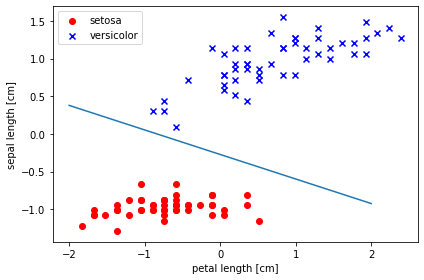

In [23]:
plt.scatter(X_std[:50, 0], X_std[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X_std[50:100, 0], X_std[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.plot(line_x,line_y)
plt.xlabel('petal length [cm]')
plt.ylabel('sepal length [cm]')
plt.legend(loc='upper left')
plt.tight_layout()

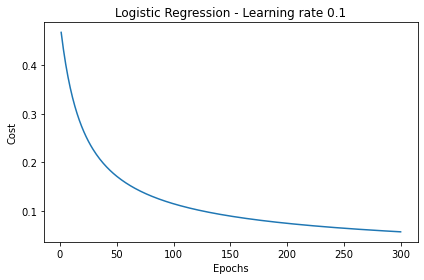

In [25]:

plt.plot(range(1, len(loss_list) + 1), loss_list)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Logistic Regression - Learning rate 0.1')

plt.tight_layout()

### 练习：

In [26]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Setosa', 0, 1)

X = df.iloc[0:100, [0,1,2,3]].values

In [27]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [28]:
input_size = 4
output_size = 1
num_epochs = 300
learning_rate = 0.1

In [30]:
model_lr = nn.Linear(input_size, output_size)
criterion = torch.nn.BCELoss() 
optimizer = torch.optim.SGD(model_lr.parameters(), lr=learning_rate)  

In [31]:
loss_list = []

for epoch in range(num_epochs):

    inputs = torch.tensor(X_std,dtype=torch.float)
    targets = torch.tensor(y.reshape(-1,1),dtype=torch.float)


    outputs = torch.sigmoid(model_lr(inputs))
    loss = criterion(outputs, targets)
    loss_list.append(loss.tolist())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 50 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))



Epoch [50/300], Loss: 0.2170
Epoch [100/300], Loss: 0.1239
Epoch [150/300], Loss: 0.0883
Epoch [200/300], Loss: 0.0694
Epoch [250/300], Loss: 0.0576
Epoch [300/300], Loss: 0.0495


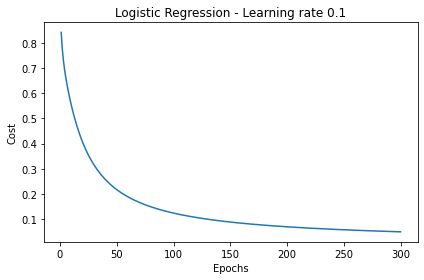

In [32]:

plt.plot(range(1, len(loss_list) + 1), loss_list)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Logistic Regression - Learning rate 0.1')

plt.tight_layout()